<a href="https://colab.research.google.com/github/Margo-s-M/Git_test/blob/master/Python_for_DA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducing the dataset.**
   **Primary data processing**.

## The dataset contains information on sales of the company's products, which operates on the world market and sells goods in ordinary stores and online stores. The dataset consists of three tables:

*events.csv — sales in several years;
products.csv — product categories and their codes;
countries.csv — countries, regions and their codes.*


In [1]:
from google.colab import drive
drive.mount("/content/drive")
%cd /content/drive/MyDrive/final_project

Mounted at /content/drive
/content/drive/MyDrive/final_project


In [2]:

import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df_products = pd.read_csv("products.csv")
df_products

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies
5,4594,Fruits
6,5988,Vegetables
7,7331,Baby Food
8,8875,Meat
9,8293,Cosmetics


In [4]:
df_countries = pd.read_csv("countries.csv")
df_countries

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia
...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,Oceania,Polynesia
245,Western Sahara,EH,ESH,Africa,Northern Africa
246,Yemen,YE,YEM,Asia,Western Asia
247,Zambia,ZM,ZMB,Africa,Sub-Saharan Africa


In [5]:
df_events = pd.read_csv("events.csv")
df_events.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79




1.   Combining tables by key




In [6]:
df_merge = pd.merge(df_events, df_products, how='left', left_on='Product ID', right_on='id')
df_merge = pd.merge(df_merge,df_countries, how='left', left_on='Country Code', right_on='alpha-3')
df_merge.drop(columns='id', inplace=True)
df_merge.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,item_type,name,alpha-2,alpha-3,region,sub-region
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11,Cereal,Norway,NO,NOR,Europe,Northern Europe
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11,Cereal,Serbia,RS,SRB,Europe,Southern Europe
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54,Household,NaN,NaN,NaN,NaN,NaN
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84,Clothes,Montenegro,ME,MNE,Europe,Southern Europe
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79,Beverages,Serbia,RS,SRB,Europe,Southern Europe


In [7]:
#View general table information.
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
 10  item_type       1330 non-null   object 
 11  name            1248 non-null   object 
 12  alpha-2         1248 non-null   object 
 13  alpha-3         1248 non-null   object 
 14  region          1248 non-null   object 
 15  sub-region      1248 non-null   object 
dtypes: float64(3), int64(2), object(11)
memory usage: 166.4+ KB




1.  Units Sold Processing, Median Filling
2.  Convert date to datetime format
3.  Country Code filling in spaces with the value "unknown".
4.  Checking for duplicates.
5.  Analysis of the ring size of unique values.
6.  Verification of statistical characteristics
7.  Units Sold data type replacement.
8.  Replacing the data type in Product ID.
9.  Replacing the data type in Order ID
10. General information about data.  
11. Checking data volumes.
12. Checking the readiness of the data for analysis


   











In [8]:
#0 Reduction to one case
df_merge = df_merge.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
df_merge.columns = df_merge.columns.str.upper()
df_merge.rename(columns=lambda x: x.replace('_', ' ').title(), inplace=True)
df_merge.head()

,Order Id,Order Date,Ship Date,Order Priority,Country Code,Product Id,Sales Channel,Units Sold,Unit Price,Unit Cost,Item Type,Name,Alpha-2,Alpha-3,Region,Sub-Region
0,100640618,10/8/2014,10/18/2014,m,nor,2103,online,650.0,205.70,117.11,cereal,norway,no,nor,europe,northern europe
1,100983083,8/11/2016,8/11/2016,c,srb,2103,offline,1993.0,205.70,117.11,cereal,serbia,rs,srb,europe,southern europe
2,101025998,7/18/2014,8/11/2014,m,NaN,7940,online,4693.0,668.27,502.54,household,NaN,NaN,NaN,NaN,NaN
3,102230632,5/13/2017,6/13/2017,l,mne,2455,online,1171.0,109.28,35.84,clothes,montenegro,me,mne,europe,southern europe
4,103435266,8/11/2012,9/18/2012,h,srb,1270,offline,7648.0,47.45,31.79,beverages,serbia,rs,srb,europe,southern europe


In [9]:
#1
df_merge['Units Sold'] = df_merge['Units Sold'].fillna(df_events['Units Sold'].median())

In [10]:
#2
df_merge['Order Date'] = pd.to_datetime(df_merge['Order Date'])
df_merge['Ship Date'] = pd.to_datetime(df_merge['Ship Date'])


In [11]:
#3
df_merge['Country Code'] = df_merge['Country Code'].fillna('unknown')
df_merge['Name'] = df_merge['Name'].fillna('unknown')
df_merge['Alpha-2'] = df_merge['Alpha-2'].fillna('unknown')
df_merge['Alpha-3'] = df_merge['Alpha-3'].fillna('unknown')
df_merge['Region'] = df_merge['Region'].fillna('unknown')
df_merge['Sub-Region'] = df_merge['Sub-Region'].fillna('unknown')

In [12]:
#4
df_merge.duplicated().sum()

np.int64(0)

In [13]:
#5
df_merge.nunique()

,0
Order Id,1330
Order Date,1049
Ship Date,1070
Order Priority,6
Country Code,46
Product Id,12
Sales Channel,2
Units Sold,1240
Unit Price,12
Unit Cost,12


In [14]:
#6
df_merge.describe()

,Order Id,Order Date,Ship Date,Product Id,Units Sold,Unit Price,Unit Cost
count,1.330000e+03,1330,1330,1330.000000,1330.000000,1330.000000,1330.000000
mean,5.412048e+08,2013-10-12 06:09:12.180451072,2013-11-06 00:46:33.383458816,5788.096241,4952.216541,264.893541,187.246812
min,1.006406e+08,2010-01-01 00:00:00,2010-01-10 00:00:00,1270.000000,2.000000,9.330000,6.920000
25%,3.190004e+08,2011-12-16 06:00:00,2012-01-03 00:00:00,3127.000000,2360.750000,81.730000,35.840000
50%,5.387164e+08,2013-10-17 00:00:00,2013-11-09 00:00:00,5988.000000,4962.000000,154.060000,97.440000
75%,7.544628e+08,2015-08-28 18:00:00,2015-10-03 18:00:00,8681.000000,7458.750000,437.200000,263.330000
max,9.998797e+08,2017-07-23 00:00:00,2017-08-31 00:00:00,8969.000000,9999.000000,668.270000,524.960000
std,2.573882e+08,NaN,NaN,2820.728878,2903.012194,217.323460,176.158873


In [15]:
 #7
df_merge['Units Sold'] = df_merge['Units Sold'].astype(int)

In [16]:
#8
df_merge['Product Id'] = df_merge['Product Id'].astype(str)

In [17]:
#9
df_merge['Order Id'] = df_merge['Order Id'].astype(str)

In [18]:
#10
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Id        1330 non-null   object        
 1   Order Date      1330 non-null   datetime64[ns]
 2   Ship Date       1330 non-null   datetime64[ns]
 3   Order Priority  1330 non-null   object        
 4   Country Code    1330 non-null   object        
 5   Product Id      1330 non-null   object        
 6   Sales Channel   1330 non-null   object        
 7   Units Sold      1330 non-null   int64         
 8   Unit Price      1330 non-null   float64       
 9   Unit Cost       1330 non-null   float64       
 10  Item Type       1330 non-null   object        
 11  Name            1330 non-null   object        
 12  Alpha-2         1330 non-null   object        
 13  Alpha-3         1330 non-null   object        
 14  Region          1330 non-null   object        
 15  Sub-

In [19]:
#11
df_merge.shape

(1330, 16)

In [20]:
#12
df_merge.isna().sum()

,0
Order Id,0
Order Date,0
Ship Date,0
Order Priority,0
Country Code,0
Product Id,0
Sales Channel,0
Units Sold,0
Unit Price,0
Unit Cost,0


# **Adding new columns**.

1.   Revenue
2.   Costs
3.   Profit
4.   Year
5.   Moon
6.   Quarter
7.   Weekday
8.   Delivery time
9.   Profit margin (%)









In [21]:
#1
df_merge['Revenue'] = df_merge['Units Sold']* df_merge['Unit Price']

#2
df_merge['Cost'] = df_merge['Units Sold'] * df_merge['Unit Cost']

#3
df_merge['Profit'] = df_merge['Revenue'] - df_merge['Cost']


In [22]:
#4
df_merge['Order Year'] = df_merge['Order Date'].dt.year
#5
df_merge['Order Month'] = df_merge['Order Date'].dt.month
df_merge['Order Month_name'] = df_merge['Order Date'].dt.month_name()
#6
df_merge['Quarter'] = df_merge['Order Date'].dt.quarter
#7
df_merge['Order day of the week'] = df_merge['Order Date'].dt.day_name()
#8
df_merge['Shipping Time'] = (df_merge['Ship Date'] - df_merge['Order Date']).dt.days
#9
df_merge['Margin Profit'] = df_merge['Profit'] / df_merge['Revenue'] * 100

In [23]:
totals = df_merge[['Revenue','Cost', 'Profit']].sum()
print(totals.apply(lambda x: f"{x:,.0f}"))

Revenue    1,704,628,371
Cost       1,202,785,738
Profit       501,842,633
dtype: object


**Обчислення загальних метрик**


1.   Загальна кількість замовлень
2.   Кількість охоплених країн
3.   Загальна кількість проданих одиниць
4.   Кількість унікальних типів товарів
5.   Середній час доставки
6.   Найпопулярніша категорія товарів




In [24]:
#1
total_orders = df_merge.shape[0]
print(f'Number of orders:{total_orders}')
#2
df_merge = df_merge.rename(columns={'Name': 'Country Name'})
un_countries =df_merge['Country Name'].nunique()
print(f'Number of covered countries:{un_countries}')
#3
total_units_sold = df_merge['Units Sold'].sum()
print(f'Total number of units sold:{total_units_sold}')
#4
un_item_type = df_merge['Item Type'].unique()
print(f'Number of unique product types:{un_item_type}')
#5
top_item_types = df_merge.groupby('Item Type')['Revenue'].sum().idxmax()
print(f'The most popular category of products:{top_item_types}')

Number of orders:1330
Number of covered countries:46
Total number of units sold:6586448
Number of unique product types:['cereal' 'household' 'clothes' 'beverages' 'office supplies' 'fruits'
 'vegetables' 'baby food' 'meat' 'cosmetics' 'snacks' 'personal care']
The most popular category of products:office supplies


In [25]:
df_merge.head()


,Order Id,Order Date,Ship Date,Order Priority,Country Code,Product Id,Sales Channel,Units Sold,Unit Price,Unit Cost,...,Revenue,Cost,Profit,Order Year,Order Month,Order Month_name,Quarter,Order day of the week,Shipping Time,Margin Profit
0,100640618,2014-10-08,2014-10-18,m,nor,2103,online,650,205.70,117.11,...,133705.00,76121.50,57583.50,2014,10,October,4,Wednesday,10,43.067574
1,100983083,2016-08-11,2016-08-11,c,srb,2103,offline,1993,205.70,117.11,...,409960.10,233400.23,176559.87,2016,8,August,3,Thursday,0,43.067574
2,101025998,2014-07-18,2014-08-11,m,unknown,7940,online,4693,668.27,502.54,...,3136191.11,2358420.22,777770.89,2014,7,July,3,Friday,24,24.799856
3,102230632,2017-05-13,2017-06-13,l,mne,2455,online,1171,109.28,35.84,...,127966.88,41968.64,85998.24,2017,5,May,2,Saturday,31,67.203514
4,103435266,2012-08-11,2012-09-18,h,srb,1270,offline,7648,47.45,31.79,...,362897.60,243129.92,119767.68,2012,8,August,3,Saturday,38,33.003161


In [26]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Order Id               1330 non-null   object        
 1   Order Date             1330 non-null   datetime64[ns]
 2   Ship Date              1330 non-null   datetime64[ns]
 3   Order Priority         1330 non-null   object        
 4   Country Code           1330 non-null   object        
 5   Product Id             1330 non-null   object        
 6   Sales Channel          1330 non-null   object        
 7   Units Sold             1330 non-null   int64         
 8   Unit Price             1330 non-null   float64       
 9   Unit Cost              1330 non-null   float64       
 10  Item Type              1330 non-null   object        
 11  Country Name           1330 non-null   object        
 12  Alpha-2                1330 non-null   object        
 13  Alp

#**Consolidated tables**

**Analysis** **sales**

In [27]:
pd.options.display.float_format = '{:,.2f}'.format

In [28]:
#Revenue and profit by product category
item_summary = pd.pivot_table(df_merge, index= 'Item Type', values=['Revenue', 'Cost','Profit', 'Units Sold'], aggfunc='sum').reset_index()
item_summary_sorted = item_summary.sort_values(by='Revenue', ascending=False).reset_index(drop=True)
item_summary_sorted

,Item Type,Cost,Profit,Revenue,Units Sold
0,office supplies,"324,236,819.36","77,977,176.25","402,213,995.61",617641
1,household,"221,242,732.46","72,962,466.77","294,205,199.23",440249
2,cosmetics,"140,431,519.03","92,723,306.17","233,154,825.20",533291
3,meat,"195,233,873.98","30,621,562.40","225,855,436.38",535342
4,baby food,"89,706,590.52","53,940,997.16","143,647,587.68",562706
5,cereal,"54,536,370.35","41,255,034.15","95,791,404.50",465685
6,vegetables,"52,970,725.92","36,776,002.72","89,746,728.64",582544
7,snacks,"47,761,190.40","27,027,422.40","74,788,612.80",490160
8,clothes,"21,195,238.40","43,431,314.40","64,626,552.80",591385
9,personal care,"31,884,808.80","14,099,758.40","45,984,567.20",562640


In [29]:
#Percentage of sales units of the total
item_summary_sorted['Units Sold %'] = (item_summary_sorted['Units Sold']/ item_summary_sorted['Units Sold'].sum()) * 100
item_summary_percent = item_summary_sorted.sort_values(by='Units Sold %', ascending=False)

In [30]:
#Revenue by Region
region_summary = pd.pivot_table(df_merge, index='Region',values=['Revenue', 'Profit', 'Order Id'],aggfunc={'Revenue': 'sum', 'Profit': 'sum', 'Order Id': 'nunique'}).rename(columns={'Order Id': 'Orders'}).reset_index()
region_summary = region_summary.sort_values(by='Revenue', ascending=False)
region_summary



,Region,Orders,Profit,Revenue
1,europe,1166,"448,964,956.23","1,508,151,836.33"
2,unknown,82,"27,725,423.94","103,145,646.95"
0,asia,82,"25,152,252.95","93,330,887.37"


In [31]:
#Sales by countries
country_summary = pd.pivot_table(df_merge, index='Country Name', values=['Revenue', 'Profit', 'Order Id'],aggfunc={'Revenue': 'sum', 'Profit': 'sum', 'Order Id': 'nunique'}).rename(columns={'Order Id': 'Orders'}).reset_index()
country_summary = country_summary.sort_values(by='Revenue', ascending=False)
country_summary.head()

,Country Name,Orders,Profit,Revenue
45,unknown,82,"27,725,423.94","103,145,646.95"
10,czech republic,31,"13,635,593.78","53,543,932.14"
43,ukraine,33,"14,804,925.74","53,252,317.54"
6,bosnia and herzegovina,33,"13,257,602.77","50,117,508.49"
26,macedonia,32,"13,684,099.95","49,222,085.25"


In [32]:
#Revenue and profit by sales channels
channel_summary = pd.pivot_table(df_merge, index='Sales Channel', values=['Revenue', 'Profit'], aggfunc='sum').reset_index()
channel_summary

,Sales Channel,Profit,Revenue
0,offline,"253,874,692.93","874,259,586.32"
1,online,"247,967,940.19","830,368,784.33"


In [33]:
#Revenue by Day of Week
day_sales = pd.pivot_table(df_merge, values='Revenue', index='Order day of the week', columns='Item Type', aggfunc='sum', fill_value=0).reset_index()
day_sales

Item Type,Order day of the week,baby food,beverages,cereal,clothes,cosmetics,fruits,household,meat,office supplies,personal care,snacks,vegetables
0,Friday,"20,200,051.12","3,202,875.00","12,884,430.90","6,696,022.72","61,875,167.20","409,922.88","43,563,853.03","22,602,756.75","68,955,324.48","5,781,008.09","8,382,440.04","9,253,151.72"
1,Monday,"15,600,926.64","4,845,736.35","8,572,341.80","7,442,951.52","24,434,233.60","1,101,798.36","72,058,885.83","42,352,693.32","61,175,318.61","5,859,305.43","16,465,823.28","15,964,005.32"
2,Saturday,"22,549,648.24","4,869,793.50","19,802,533.30","11,023,510.72","28,455,599.20","1,018,248.21","37,974,442.75","33,468,533.70","42,309,764.91","7,422,718.60","15,072,462.72","9,673,889.58"
3,Sunday,"23,923,054.64","4,719,851.50","18,619,141.20","11,471,449.44","21,913,775.60","1,266,547.50","31,840,392.42","23,433,036.27","66,650,692.29","6,852,243.20","11,298,091.26","17,562,685.94"
4,Thursday,"18,823,581.36","4,058,778.10","11,986,961.80","9,657,620.00","30,887,742.80","524,112.75","31,225,584.02","27,767,534.13","52,367,052.15","7,819,109.10","6,776,840.70","13,027,313.60"
5,Tuesday,"21,812,654.88","3,808,716.60","11,950,758.60","13,577,165.76","35,592,014.80","399,230.70","13,682,159.98","38,585,215.62","49,799,982.33","6,228,643.30","10,626,739.26","9,554,030.90"
6,Wednesday,"20,737,670.80","3,587,409.80","11,975,236.90","4,757,832.64","29,996,292.00","800,439.36","63,859,881.20","37,645,666.59","60,955,860.84","6,021,539.48","6,166,215.54","14,711,651.58"


#**visualization**

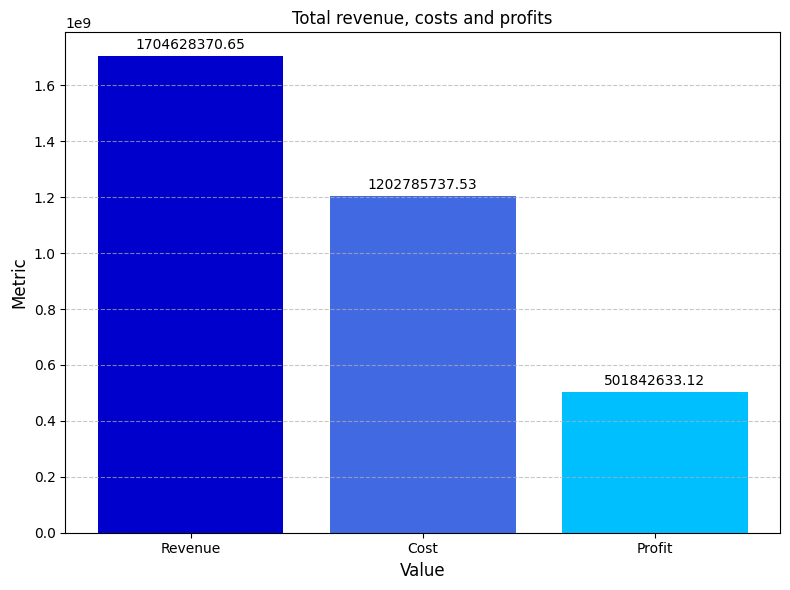

In [34]:
#Total revenue, costs and profits
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(totals.index, totals.values, color=['mediumblue','royalblue','deepskyblue'])
ax.bar_label(bars, fmt='%.2f', fontsize=10, padding=3)
plt.title('Total revenue, costs and profits')
plt.ylabel('Metric', fontsize=12)
plt.xlabel('Value', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Summary


1.   Total revenue - 1.7 billion
1.   Total cost - 1.2 billion
2.   Total profit - about 0.5 billion
This means that the company works with positive profitability: the profit is about a third of the costs.




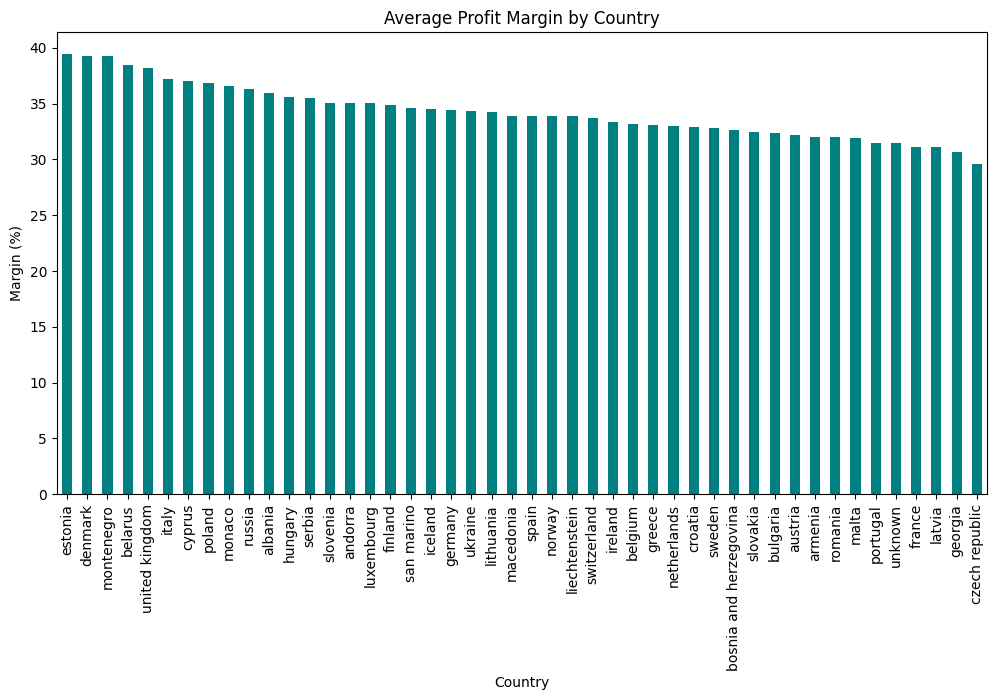

In [35]:
#Average Profit Margin by Country
margin_by_country = df_merge.groupby("Country Name")["Margin Profit"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
margin_by_country.plot(kind="bar", color="teal")
plt.title("Average Profit Margin by Country")
plt.ylabel("Margin (%)")
plt.xlabel("Country")
plt.xticks(rotation=90)
plt.show()


Estonia, Denmark and Montenegro have the highest average margins (≈39%), while the Czech Republic and Georgia have the lowest — (≈29%). In general, the margin across countries is in the range of 30–40%, which indicates a stable level of profitability with moderate differences between markets.''

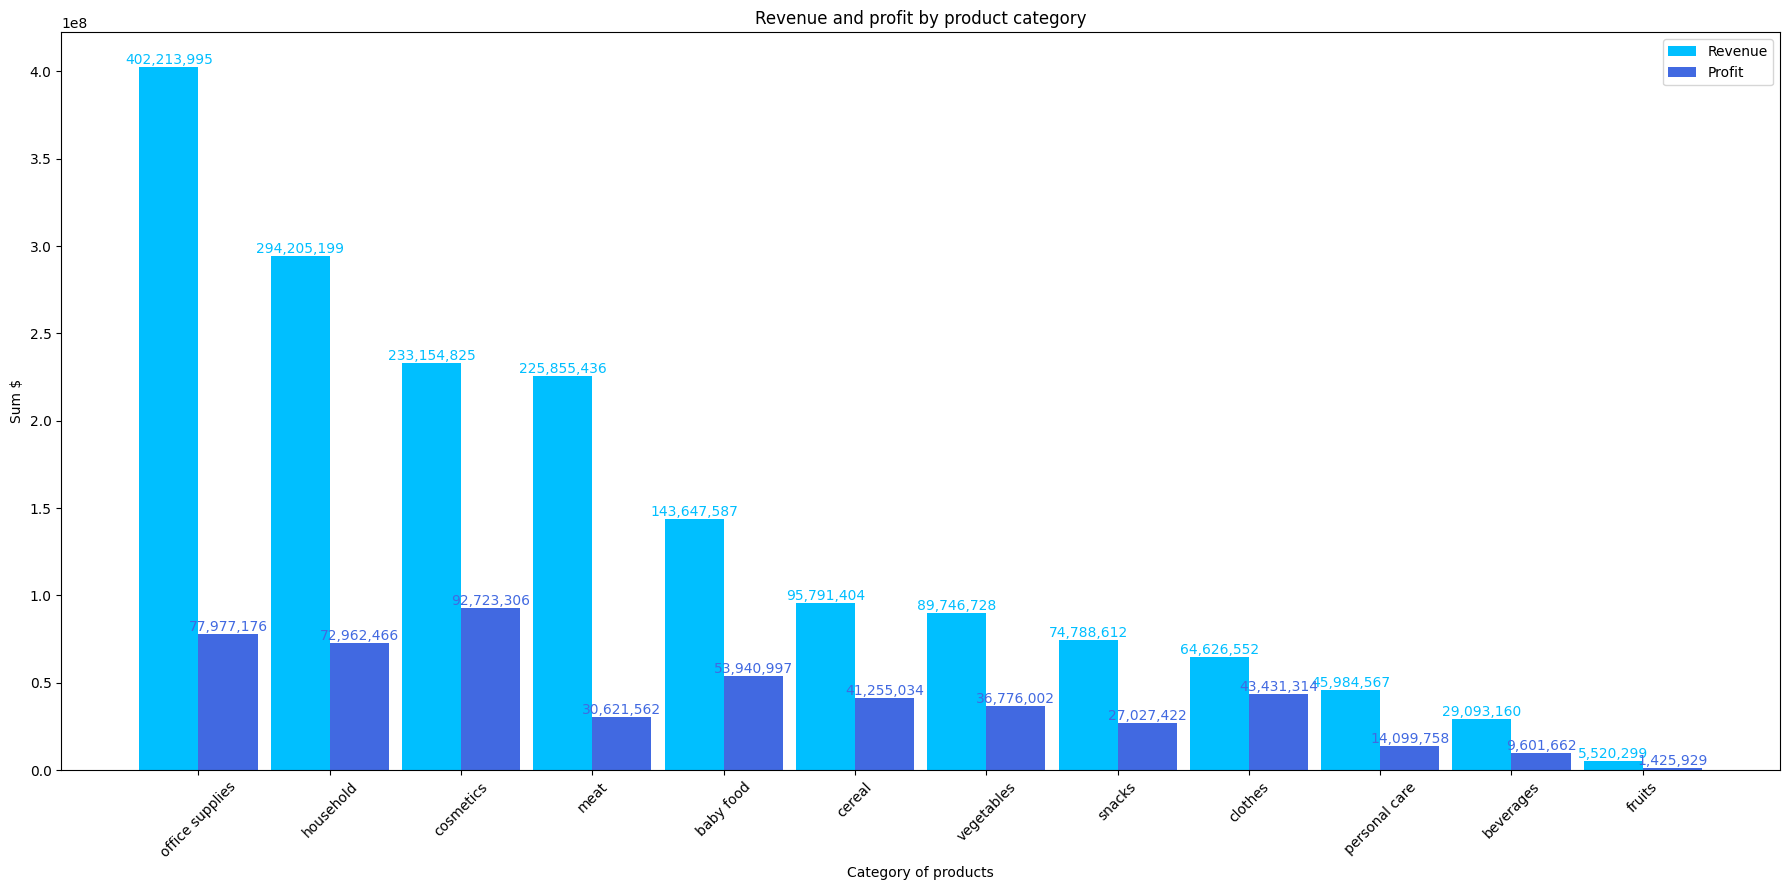

In [36]:
#Revenue and profit by product category
plt.figure(figsize=(18, 9))
bar_width = 0.45
index = range(len(item_summary_sorted))
bar_revebue = plt.bar(index, item_summary_sorted['Revenue'], bar_width, label='Revenue', color='deepskyblue')
bar_profit = plt.bar([i + bar_width for i in index], item_summary_sorted['Profit'], bar_width, label='Profit', color='royalblue')
for bar in bar_revebue:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height):,}', ha='center', va='bottom', fontsize=10, color='deepskyblue')

for bar in bar_profit:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height):,}', ha='center', va='bottom', fontsize=10, color='royalblue')

plt.xlabel('Category of products')
plt.ylabel('Sum $')
plt.title('Revenue and profit by product category')
plt.xticks([i + bar_width/2 for i in index], item_summary_sorted['Item Type'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Office supplies, household and cosmetics give the largest income, but the largest profit is observed in cosmetics. Low-turnover categories (fruits, beverages, personal care) bring a minimal contribution to the total profit.

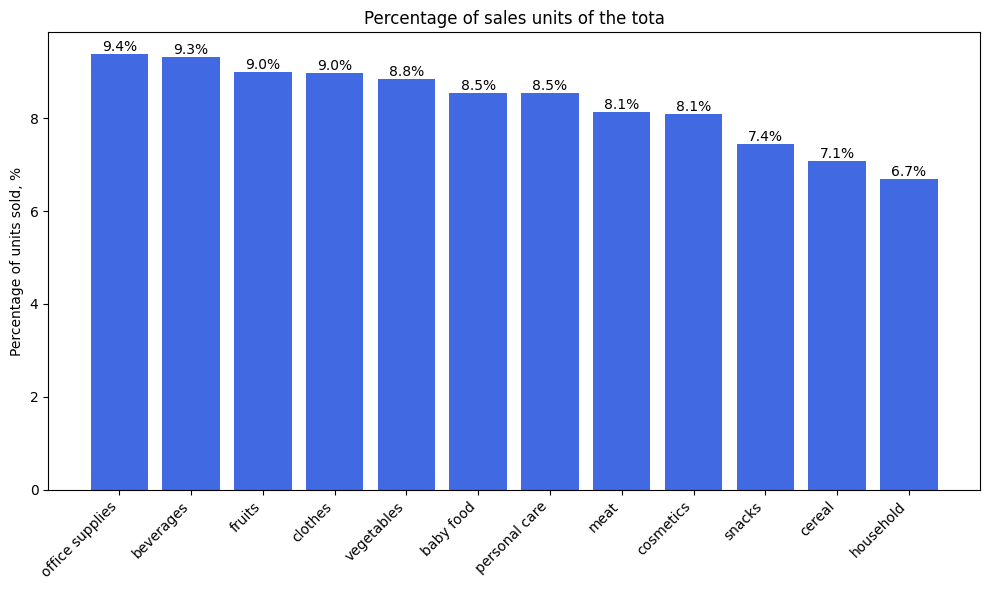

In [37]:
#Percentage of sales units of the total
plt.figure(figsize=(10,6))
bars = plt.bar(item_summary_percent['Item Type'], item_summary_percent['Units Sold %'], color ='royalblue')
plt.ylabel('Percentage of units sold, %')
plt.title('Percentage of sales units of the tota')
plt.xticks(rotation=45, ha='right')

for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x()+bar.get_width()/2, height,f'{height:.1f}%', ha='center', va='bottom',fontsize=10)

plt.tight_layout()
plt.show()


Stationery, beverages and fruit provide the largest share of units sold, each accounting for approximately 9% of total sales.

Even the smallest category ("household") occupies more than 6% of all sales, which indicates a fairly even distribution between categories.

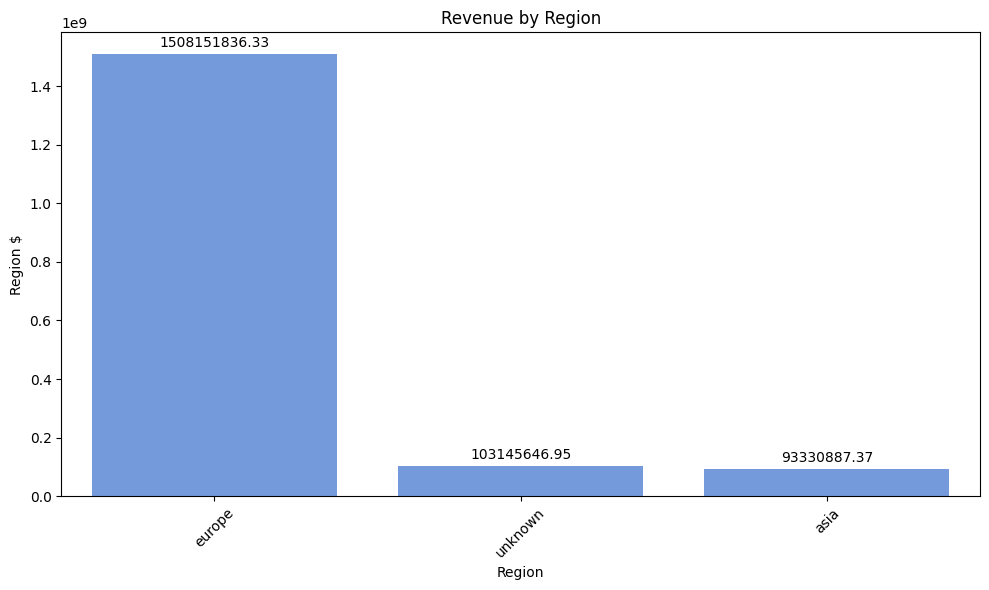

In [38]:
#Revenue by Region
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=region_summary, x='Region', y='Revenue', color='cornflowerblue')
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Region $')
plt.xticks(rotation=45)
for container in ax.containers:
  ax.bar_label(container, fmt = '%.2f', padding=3)

plt.tight_layout()
plt.show()


The absolute leader in revenue is Europe, which accounts for almost the entire amount of sales; other regions - "unknown" and "Asia" - lag far behind and cover only a small part of the total revenue.
The unknown region ("unknown") has more revenue than Asia, but even together they do not approach the European result

In [39]:

#Sales by countries
drop_unknown = country_summary[country_summary['Country Name']!= 'Unknown'].copy()
map = px.choropleth(drop_unknown, locations='Country Name', locationmode='country names',
                    color='Revenue', hover_name='Country Name', hover_data=['Profit', 'Orders'],
                    title='Sales by countries',
                    color_continuous_scale=px.colors.sequential.Viridis)

map.show()

The integrated card contains general information about profit, income and the amount of goods sold for each country.

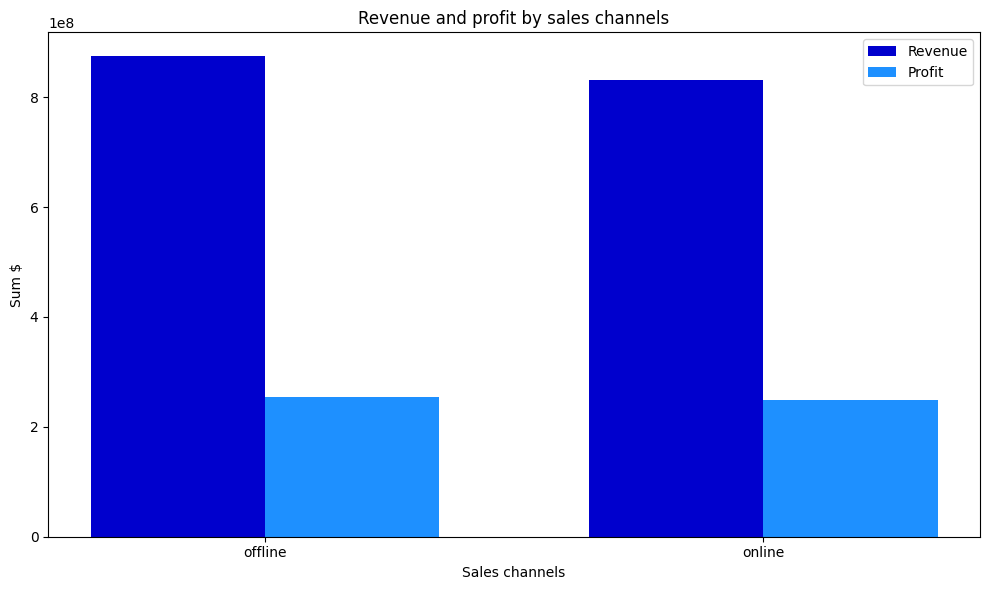

In [40]:

#Revenue and profit by sales channels
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(channel_summary))
plt.bar(index, channel_summary['Revenue'], bar_width, label='Revenue', color='mediumblue')
plt.bar([i + bar_width for i in index], channel_summary['Profit'], bar_width, label='Profit', color='dodgerblue')
plt.xlabel('Sales channels')
plt.ylabel('Sum $')
plt.title('Revenue and profit by sales channels')
plt.xticks([i + bar_width/2 for i in index], channel_summary['Sales Channel'])

plt.legend()
plt.tight_layout()
plt.show()

Both offline and online sales channels generate commensurate amounts of revenue and profit, but the offline channel is slightly ahead of the total revenue.
The share of profit in revenue is practically the same for both channels, which indicates similar efficiency in the ratio of income and profit regardless of the method of sale.

In [41]:
#Total profit by categories and sales channels
order = df_merge.groupby('Item Type')['Profit'].sum().sort_values(ascending=False).index
profit_by_channels = px.histogram(df_merge, x='Item Type', y='Profit', color='Sales Channel', barmode='group', histfunc='sum', title='Total profit by categories and sales channels', labels={'Profit':'Total profit', 'Item Type':'Product category', 'Sales Channel':'Sales channel'}, category_orders={'Item Type': order})

profit_by_channels.show()

From the analysis of the graph, it can be seen that the categories "cosmetics", "stationery", and "household goods" bring the greatest profit, while "fruits" have the lowest indicator. Sales through both channels show similar trends.

In [42]:
#Analysis of profit dependence on delivery time
dependence = px.scatter(df_merge, x='Shipping Time', y='Profit', trendline='ols',
                 title='Profit and Shipping Time')
dependence.show()


Analysis of the graph "Profit and Shipping Time" shows that the profit (from 0 to 1.5 million) does not have a clear dependence on the delivery time (from 0 to 50). The points are relatively evenly distributed, with a small profit concentration in the range of 0.5-1 million at different delivery times. This may indicate that factors other than delivery time significantly affect profits.

In [43]:
#Revenue Trend by Day of Week and Item Type
day_sales_long = df_merge.groupby(['Order day of the week', 'Item Type'])['Revenue'].sum().reset_index()
days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
day_sales_long['Order day of the week'] = pd.Categorical(day_sales_long['Order day of the week'],categories=days_order,ordered=True)
day_sales_long = day_sales_long.sort_values('Order day of the week')

trend = px.line(day_sales_long, x='Order day of the week', y='Revenue', color='Item Type', title='Revenue Trend by Day of Week and Item Type', markers=True, labels={'Revenue': 'Revenue', 'Order day of the week': 'Day of the week', 'Item Type': 'Category of product'})
trend.update_layout(hovermode='x unified', height=1000, width=1200)
trend.show()


Analysis of the graph shows that revenues from different product categories fluctuate throughout the week. The highest incomes are on Wednesdays (especially for "household goods" and "fruits"), while on Thursdays incomes for most categories fall. The categories "fruit" and "household goods" show the highest peaks, while "vegetables" and "personal hygiene" have more stable but lower rates.

In [44]:
#Dynamics of revenue by years.
rev_by_year = df_merge.groupby(['Order Year', 'Item Type'])['Revenue'].sum().reset_index()

rev_y = px.line(rev_by_year, x='Order Year', y='Revenue',color='Item Type', title='Revenue Dynamics by Year', markers=True)
rev_y.update_layout(hovermode='x unified',height=1000, width=1200)
rev_y.show()

Analysis of the graph shows that revenues from different types of goods fluctuated from 2010 to 2017. The highest income was recorded for "office goods" in 2016 (over 70 million), while "vegetables" and "food products for babies" show more stable but lower rates. Overall, revenues for most categories increased until 2016, after which they began to decline.

In [45]:
# Revenue, Cost and Profit by year and quarter
agg_df = df_merge.groupby(['Order Year', 'Quarter'])[['Revenue', 'Cost', 'Profit']].sum().reset_index()
df_long = agg_df.melt(id_vars=['Order Year', 'Quarter'], value_vars=['Revenue', 'Cost', 'Profit'], var_name='Metric', value_name='Amount')
df_long['Year-Quarter'] = df_long['Order Year'].astype(str) + '-Q' + df_long['Quarter'].astype(str)
df_long = df_long.sort_values(['Order Year', 'Quarter'])

fig = px.line(df_long, x='Year-Quarter', y='Amount', color='Metric',title='Dynamics of Revenue, Cost and Profit by Quarter',markers=True)
fig.update_layout(hovermode='x unified', height=1000, width=1200)
fig.show()

The schedule report indicates that revenues ranged from 40 million to 90 million, reaching highs in the 1st quarter of 2010, the 3rd quarter of 2012 and the 2nd quarter of 2015. Expenditures remained stable at 20 million-50 million, with peaks in the 3rd quarter of 2012 and the 2nd quarter of 2015. Profit varied from 10 million to 30 million, with the largest increase in the 3rd quarter of 2012. Overall, revenues exceeded costs, providing positive returns.

In [46]:
#Seasonality of sales
def month_to_season(month):
  if month in [12,1,2]:
    return 'Winter'
  elif month in [3,4,5]:
    return 'Spring'
  elif month in [6,7,8]:
    return 'Summer'
  elif month in [9,10,11]:
    return 'Autmn'
df_merge['Season'] = df_merge['Order Month'].apply(month_to_season)

season_sales = df_merge.groupby(['Season', 'Item Type'])['Profit'].sum().reset_index()

s_sales = px.bar(season_sales, x='Season', y='Profit', color='Item Type', title='Seasonal Sales by Item Type', barmode='group')
s_sales.show()

Analysis of the "Seasonal Sales by Item Type" graph shows that the category "office goods" brings the largest profit in all seasons, especially in winter (over 25 million). Autumn and winter have the highest overall returns, while spring and summer show lower rates. The categories "food for babies" and "vegetables" also show a stable income, especially in summer and winter.

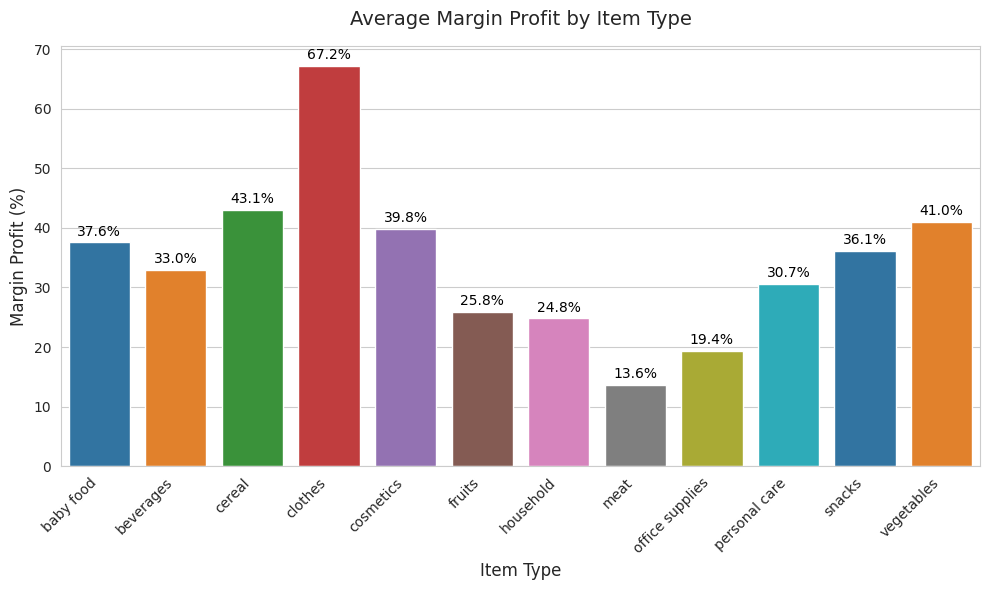

In [47]:
# Average Margin Profit by Item Type
mean_margin_by_item = df_merge.groupby('Item Type')['Margin Profit'].mean().reset_index()
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Item Type', y='Margin Profit', hue='Item Type', data=mean_margin_by_item, palette='tab10', legend=False)

plt.title('Average Margin Profit by Item Type', fontsize=14, pad=15)
plt.xlabel('Item Type', fontsize=12)
plt.ylabel('Margin Profit (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.1f}%',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='baseline', fontsize=10, color='black',
                      xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

Analysis of the "Average Margin Profit by Item Type" graph shows that the category "clothing" has the highest average marginal profit (67.2%), followed by "vegetables" (41.0%) and "food products for babies" (37.6%). The lowest profit is observed in "meat" (13.6%) and "office goods" (19.4%). The categories "cosmetics" (39.8%) and "cereals" (43.1%) also show a significant profit, while "beverages" (33.0%) and "snacks" (30.7%) have average indicators.

#Investigation


In [48]:
#Selection of clothes and meat from categories
clothes_df = df_merge[df_merge['Item Type'] == 'clothes']
meat_df = df_merge[df_merge['Item Type'] == 'meat']
#Carrying out all the necessary aggregations
clothes_agg = clothes_df.agg({'Revenue': ['sum', 'mean'],'Cost': ['sum', 'mean'],'Profit': ['sum', 'mean'],'Units Sold': ['sum', 'mean'],'Margin Profit': 'mean','Unit Price': 'mean','Unit Cost': 'mean','Shipping Time': 'mean'})
meat_agg = meat_df.agg({'Revenue': ['sum', 'mean'],'Cost': ['sum', 'mean'],'Profit': ['sum', 'mean'],'Units Sold': ['sum', 'mean'],'Margin Profit': 'mean','Unit Price': 'mean','Unit Cost': 'mean','Shipping Time': 'mean'})
#Grouping by sales regions
clothes_region = clothes_df.groupby('Region').agg({'Profit': 'sum','Margin Profit': 'mean','Units Sold': 'sum'}).sort_values('Profit', ascending=False)
meat_region = meat_df.groupby('Region').agg({'Profit': 'sum','Margin Profit': 'mean','Units Sold': 'sum'}).sort_values('Profit', ascending=False)
#Grouping by sales channels
clothes_channel = clothes_df.groupby('Sales Channel').agg({'Profit': 'sum','Margin Profit': 'mean'})
meat_channel = meat_df.groupby('Sales Channel').agg({'Profit': 'sum','Margin Profit': 'mean'})
#Grouping by sales year
clothes_year = clothes_df.groupby('Order Year').agg({'Profit': 'sum','Margin Profit': 'mean'}).sort_index()
meat_year = meat_df.groupby('Order Year').agg({'Profit': 'sum','Margin Profit': 'mean'}).sort_index()
#Grouping by years and units of sales
clothes_year = clothes_df.groupby('Order Year').agg({'Profit': 'sum', 'Units Sold': 'sum'}).reset_index()
meat_year = meat_df.groupby('Order Year').agg({'Profit': 'sum', 'Units Sold': 'sum'}).reset_index()


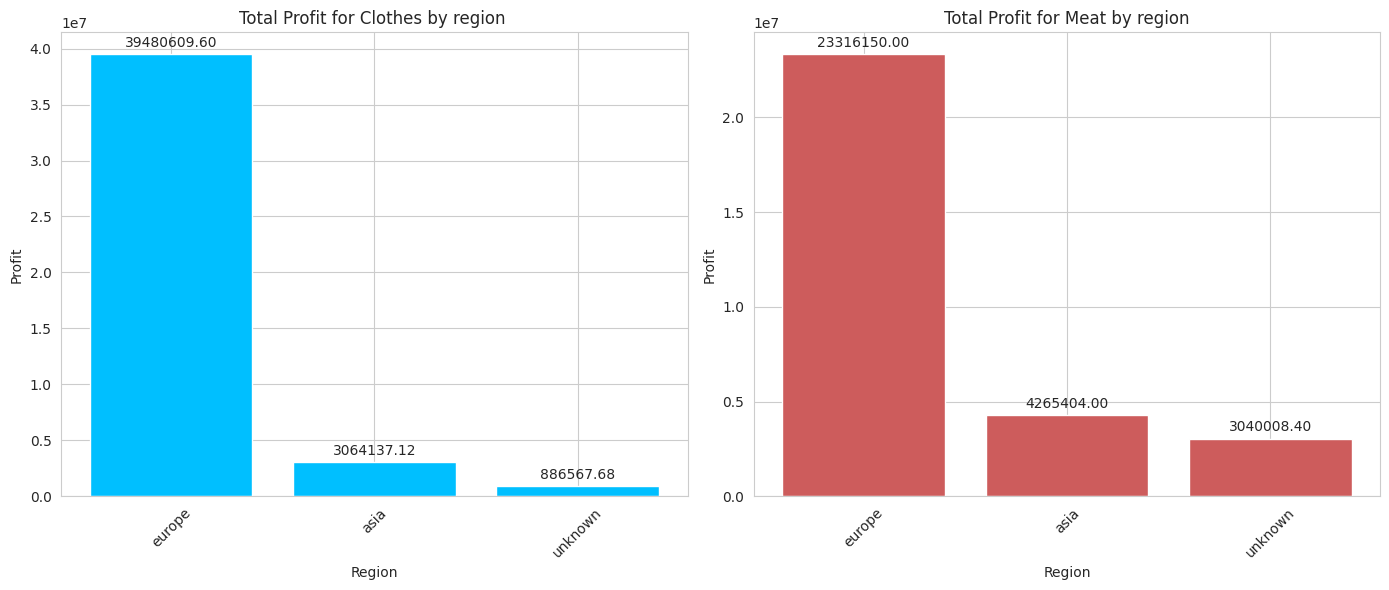

In [49]:
  # Profit by region
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Clothes
top_clothes_region = clothes_region.nlargest(5, 'Profit')
bars1 = axs[0].bar(top_clothes_region.index, top_clothes_region['Profit'], color='deepskyblue')
axs[0].bar_label(bars1, fmt='%.2f', fontsize=10, padding=3)
axs[0].set_title('Total Profit for Clothes by region ')
axs[0].set_ylabel('Profit')
axs[0].set_xlabel('Region')
axs[0].tick_params(axis='x', rotation=45)

# Meat
top_meat_region = meat_region.nlargest(5, 'Profit')
bars2 = axs[1].bar(top_meat_region.index, top_meat_region['Profit'], color='indianred')
axs[1].bar_label(bars2, fmt='%.2f', fontsize=10, padding=3)
axs[1].set_title('Total Profit for Meat by region')
axs[1].set_ylabel('Profit')
axs[1].set_xlabel('Region')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Analysis Total Profit for Clothes by Region**
Europe: Highest profit — 39480609.60, which is much higher than other regions.
Asia: Profit is 3064137.12, which is much lower but still noticeable.
Unknown: Lowest profit — 886567.68, indicating the minimum contribution of this region.
**Analysis of Total Profit for Meat by Region**
Europe: Highest profit - 23316150.00 , which is the dominant indicator.
Asia: Profit is 4265404.00 , which is a moderate contribution.
Unknown: The lowest profit is 3040008.40, which is also relatively low.
agal conclusion
**For both categories** clothing and meat, Europe shows the greatest profit, far ahead of Asia and the "Unknown" region. The "Unknown" region has the lowest contribution to profit for both categories, while Asia shows an average level of profit.


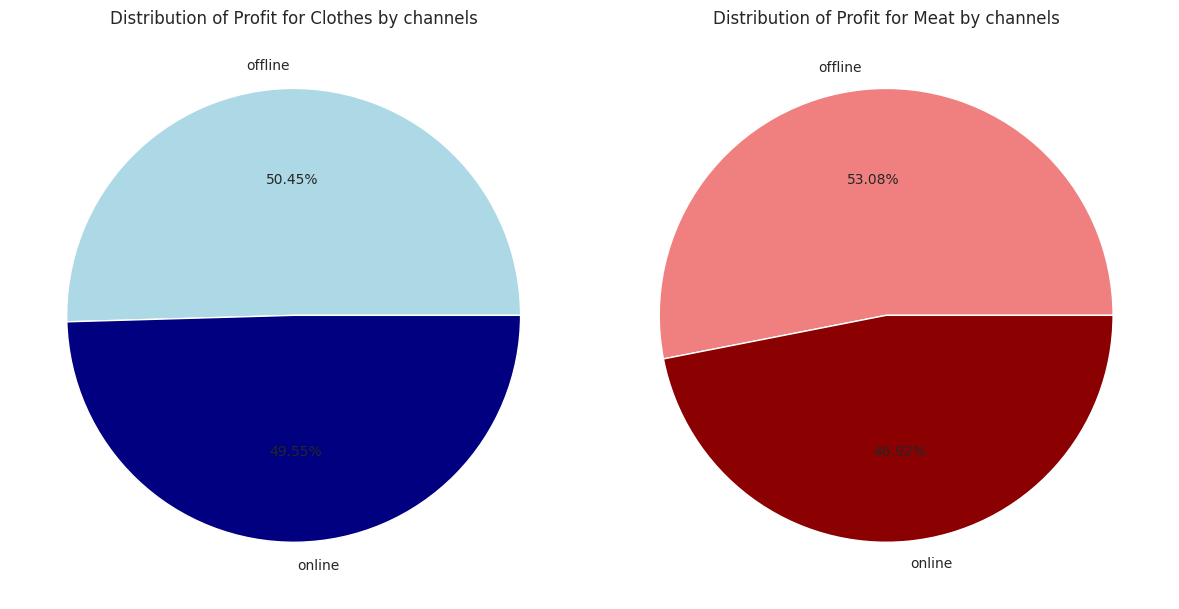

In [50]:
#The resul of sales meat and clothes by channels
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# Clothes
axs[0].pie(clothes_channel['Profit'], labels=clothes_channel.index, autopct='%.2f%%', colors=['lightblue', 'navy'])
axs[0].set_title('Distribution of Profit for Clothes by channels')

# Meat
axs[1].pie(meat_channel['Profit'], labels=meat_channel.index, autopct='%.2f%%', colors=['lightcoral', 'darkred'])
axs[1].set_title('Distribution of Profit for Meat by channels')

plt.tight_layout()
plt.show()

**Analysis of profit distribution for clothing by channel**.
The online channel provides 49.55% of the profit, which is almost equal to the offline channel.
The offline channel is 50.45%, slightly exceeding the online channel, showing an almost even distribution.

**Analysis of profit distribution for meat by channel**.
The online channel brings 44.92% of the benefit.
The offline channel is 55.08%, but you will be able to watch over online channel.

**General conclusion**
For clothing, the profit is divided almost equally between online and offline channels, while for meat, the offline channel is significantly predominant.

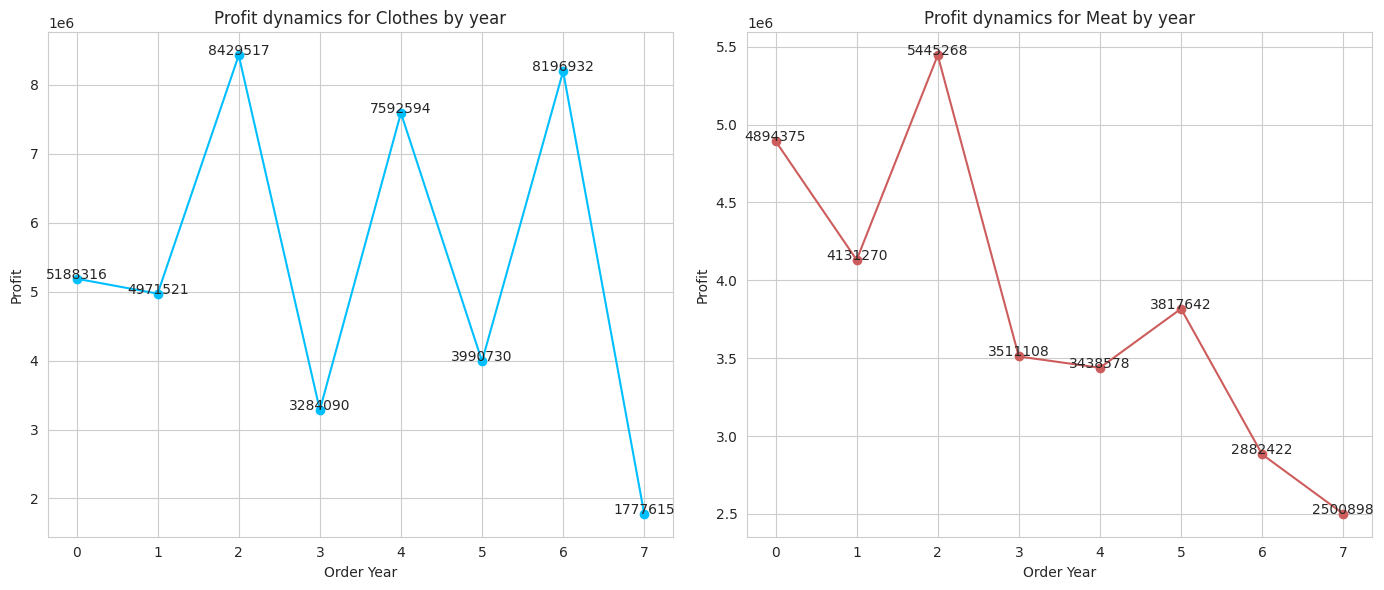

In [51]:


# Profit by year fo meat and clothes
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
# Profit for Clothes
axs[0].plot(clothes_year.index, clothes_year['Profit'], marker='o', color='deepskyblue')
axs[0].set_title('Profit dynamics for Clothes by year')
axs[0].set_ylabel('Profit')
axs[0].set_xlabel('Order Year')
for x, y in zip(clothes_year.index, clothes_year['Profit']):
    axs[0].text(x, y, f'{y:.0f}', fontsize=10, ha='center')

# Profit for Meat
axs[1].plot(meat_year.index, meat_year['Profit'], marker='o', color='indianred')
axs[1].set_title('Profit dynamics for Meat by year')
axs[1].set_ylabel('Profit')
axs[1].set_xlabel('Order Year')
for x, y in zip(meat_year.index, meat_year['Profit']):
    axs[1].text(x, y, f'{y:.0f}', fontsize=10, ha='center')

plt.tight_layout()
plt.show()

The category "clothing" showed the largest profit in the 5th year (8196932), with significant fluctuations. The category "meat" reached a peak in the 4th year (5445668), but after that there is a stable decrease. Both categories show erratic profit dynamics over the years.

In [52]:
#Number of sales by year
fig_clothes = px.scatter(clothes_year,x="Order Year", y="Profit", size="Units Sold", hover_data=["Units Sold"], title="Units of clothes soled by year", size_max=60, color_discrete_sequence=["midnightblue"])
fig_clothes.update_layout(xaxis_title="Year", yaxis_title="Total Profit", showlegend=False, xaxis=dict(tickmode="linear"))

fig_meat = px.scatter(meat_year, x="Order Year", y="Profit", size="Units Sold", hover_data=["Units Sold"], title="Units of meat sould by year", size_max=60, color_discrete_sequence=["teal"])
fig_meat.update_layout(xaxis_title="Year", yaxis_title="Total Profit", showlegend=False, xaxis=dict(tickmode="linear"))


fig_clothes.show()
fig_meat.show()

**Sales of clothing units** peaked in 2012, 2014 and 2016 (about 9 million units), with correspondingly high revenues. The lowest level of sales was recorded in 2017, which may indicate changes in market trends.
**Meat sales reached** a maximum in 2012 (5-5.5 million units), after which they began to gradually decrease, with the lowest figure in 2017 (about 2 million units). There is a general trend towards a decrease in sales volumes after 2012.

**Users can hover over each bubble for accurate revenue data and the number of units sold per year.**


#Reports
**Report on sales dynamics**

This report provides a brief overview of the company's sales dynamics in terms of product categories, individual products, and geographic sections.

So I want to share the results of the analysis based on the provided dataset, which contains information on 1330 orders from 47 countries in Europe and Asia. This dataset has details on order and delivery dates, product categories, sales channels, regions, and financials – revenue, costs, profits. This information helped us better understand how the company develops sales, what seasonal fluctuations are and what is happening in different regions.

Important conclusions The company demonstrates stable and profitable operation: total revenue reaches about 1.7 billion, and profit – 520 million, which gives a margin of about 30%. Expenditures are controlled at the level of 1.18 billion, and this helps to maintain a positive financial balance.In total, more than a thousand orders were processed, the largest markets are located in Southern Europe —, such countries as the Czech Republic, Ukraine, Bosnia and Herzegovina, Macedonia, San Marino. At the same time, a noticeable share of sales is marked "unknown", which indicates a problem with data quality. This is important, because accurate geographic data helps not only to better understand the market, but also to plan costs and profits more efficiently.

Features of sales channels and customer behavior Sales in online and offline channels are almost equally distributed (approximately 50 to 50). While the effectiveness of the channels is similar, it's surprising that demand fluctuates throughout the week, with the biggest peaks on Thursday and Sunday, and a noticeable drop on Friday and Saturday. This may indicate features of customer behavior that should be taken into account in marketing strategies.

Recommendations for further steps Focus on expanding sales in Europe's top regions, where margins are highest. To carry out validation and improvement of data quality, especially for the "unknown" category. Consider seasonal promotions for low-performance categories to stimulate demand. Implement marketing campaigns on the days with the highest customer activity - Thursday and Sunday.

# Висновки
**Звіт по динаміці продажів**
У цьому звіті наведено стислий огляд динаміки продажів компанії у розрізі товарних категорій ,окремих продуктів , а також географічних зрізів.

Тож хочу поділитися результатами аналізу на основі наданого датасету, який містить інформацію про 1330 замовлень із 47 країн Європи та Азії. У цьому наборі даних є деталі про дати замовлень і доставки, категорії товарів, канали продажів, регіони, а також фінансові показники – доходи, витрати, прибуток. Ця інформація допомогла нам краще зрозуміти, як у компанії розвиваються продажі, які є сезонні коливання і що відбувається в різних регіонах.

Важливі висновки
Компанія демонструє стабільну та прибуткову роботу: загальний дохід сягає близько 1.7 млрд, а прибуток – 520 млн, що дає маржу близько 30%. Витрати контролюються на рівні 1.18 млрд, і це допомагає зберігати позитивний фінансовий баланс. Загалом було опрацьовано понад тисячу замовлень, найбільші ринки розташовані в Південній Європі — такі країни, як Чехія, Україна, Боснія і Герцеговина, Македонія, Сан-Марино. Водночас, помітна частка продажів має позначку "unknown", що вказує на проблему з якістю даних. Це важливо, адже точні географічні дані допомагають не лише краще розуміти ринок, а й ефективніше планувати витрати та прибуток.

Особливості каналів продажів і поведінки покупців
Продажі в онлайн і офлайн каналах розподілені майже порівну (приблизно 50 на 50). Хоча ефективність каналів схожа, дивно, що попит коливається упродовж тижня: найбільші піки у четвер і неділю, а у п’ятницю та суботу помітне падіння. Це може вказувати на особливості поведінки клієнтів, які варто враховувати у маркетингових стратегіях.

Рекомендації для подальших кроків
Зосередитися на розширенні продажів у топ-регіонах Європи, де маржа найвища.
Провести перевірку та покращення якості даних, особливо для категорії "unknown".
Розглянути сезонні акції для категорій з низькою ефективністю, щоб стимулювати попит.Запровадити маркетингові кампанії у дні з найбільшою активністю покупців — четвер і неділю.

